In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.inspection import PartialDependenceDisplay



In [2]:
Train_df = pd.read_csv("Urban_train_df.csv")

In [3]:
Train_df.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Downtown,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium,urban,958061.50
1,Downtown,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium,urban,693454.50
2,Downtown,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium,urban,922103.10
3,Downtown,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low,urban,467711.46
4,Downtown,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium,urban,665358.21


In [4]:
Test_set = pd.read_csv("Urban_test_df.csv")
Test_set.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High,urban,1281406.16
1,Downtown,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,Medium,urban,689655.31
2,Downtown,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,High,urban,1047222.30
3,Downtown,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,High,urban,1431431.14
4,Downtown,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,High,urban,1224389.07


In [5]:
Test_x = Test_set.drop('Revenue',axis=1)
Test_y = np.log1p(Test_set['Revenue'])

In [6]:
Test_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,Downtown,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,High,urban
1,Downtown,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,Medium,urban
2,Downtown,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,High,urban
3,Downtown,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,High,urban
4,Downtown,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,High,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Downtown,Japanese,87,6097,66812,15,586,2.3,2.8,Yes,72,39,1190.511573,High,urban
864,Downtown,French,72,5246,59451,15,566,5.4,5.1,Yes,27,29,646.473414,Medium,urban
865,Downtown,Indian,87,5057,51442,4,192,1.7,2.1,Yes,70,86,351.636262,Medium,urban
866,Downtown,Italian,80,3388,41761,10,234,1.2,8.6,Yes,44,15,794.682576,Medium,urban


In [7]:
Test_y

0      14.063469
1      13.443949
2      13.861653
3      14.174186
4      14.017953
         ...    
863    14.121615
864    13.760062
865    13.467979
866    13.656687
867    13.124594
Name: Revenue, Length: 868, dtype: float64

## Descriptive_Analisis

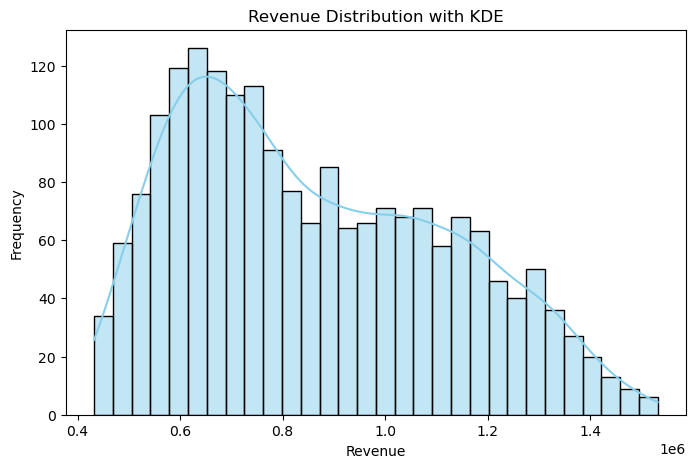

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='Revenue', kde=True, bins=30, color='skyblue')

plt.title('Revenue Distribution with KDE')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

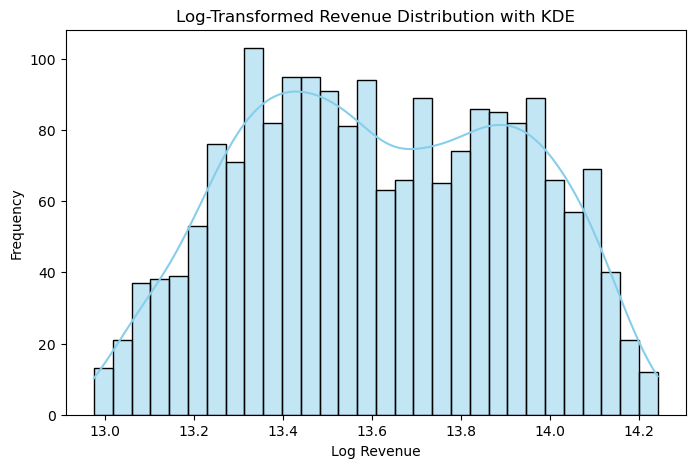

In [10]:
# Apply log transformation
Train_df['Log_Revenue'] = np.log1p(Train_df['Revenue'])  # log1p handles zero values safely

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='Log_Revenue', kde=True, bins=30, color='skyblue')

plt.title('Log-Transformed Revenue Distribution with KDE')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.show()

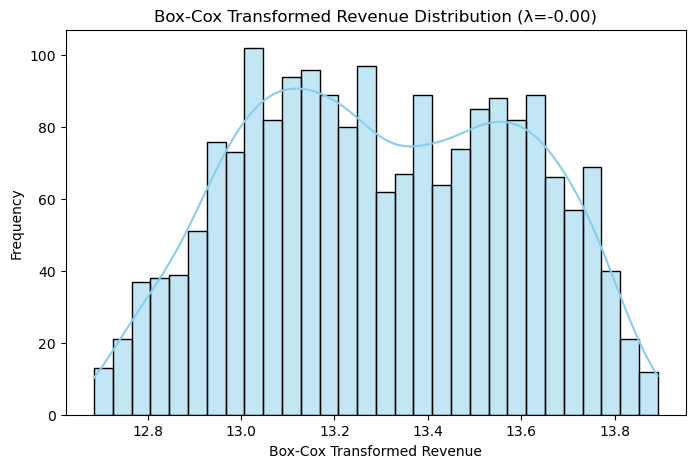

Optimal Lambda for Box-Cox Transformation: -0.00


In [11]:
# Apply Box-Cox transformation (requires positive values)
Train_df['BoxCox_Revenue'], lambda_value = boxcox(Train_df['Revenue'] + 1)  # Adding 1 to handle zero values

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=Train_df, x='BoxCox_Revenue', kde=True, bins=30, color='skyblue')

plt.title(f'Box-Cox Transformed Revenue Distribution (λ={lambda_value:.2f})')
plt.xlabel('Box-Cox Transformed Revenue')
plt.ylabel('Frequency')
plt.show()

# Print the lambda value
print(f"Optimal Lambda for Box-Cox Transformation: {lambda_value:.2f}")

In [12]:
Train_df

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters,Revenue,Log_Revenue,BoxCox_Revenue
0,Downtown,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium,urban,958061.50,13.772668,13.445087
1,Downtown,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium,urban,693454.50,13.449442,13.136939
2,Downtown,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium,urban,922103.10,13.734413,13.408635
3,Downtown,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low,urban,467711.46,13.055609,12.761005
4,Downtown,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium,urban,665358.21,13.408082,13.097483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,Downtown,French,73,1974,26123,18,207,3.2,4.1,Yes,17,66,943.346494,Medium,urban,940392.75,13.754054,13.427351
1949,Downtown,French,80,1735,18868,12,289,6.4,4.9,No,54,16,581.570918,Medium,urban,1059056.20,13.872890,13.540562
1950,Downtown,Mexican,81,3166,33652,1,438,3.6,6.9,Yes,79,44,655.056581,Low,urban,530662.50,13.181883,12.881597
1951,Downtown,Indian,77,2171,21486,9,733,4.7,8.1,No,50,31,293.577814,Medium,urban,577976.64,13.267290,12.963131


In [13]:
Train_df_x = Train_df.drop(['Revenue', 'Log_Revenue', 'BoxCox_Revenue'], axis=1)
Train_df_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,Downtown,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,Medium,urban
1,Downtown,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,Medium,urban
2,Downtown,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,Medium,urban
3,Downtown,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,Low,urban
4,Downtown,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,Medium,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,Downtown,French,73,1974,26123,18,207,3.2,4.1,Yes,17,66,943.346494,Medium,urban
1949,Downtown,French,80,1735,18868,12,289,6.4,4.9,No,54,16,581.570918,Medium,urban
1950,Downtown,Mexican,81,3166,33652,1,438,3.6,6.9,Yes,79,44,655.056581,Low,urban
1951,Downtown,Indian,77,2171,21486,9,733,4.7,8.1,No,50,31,293.577814,Medium,urban


In [14]:
Train_df_y = Train_df['Log_Revenue']
Train_df_y

0       13.772668
1       13.449442
2       13.734413
3       13.055609
4       13.408082
          ...    
1948    13.754054
1949    13.872890
1950    13.181883
1951    13.267290
1952    13.727953
Name: Log_Revenue, Length: 1953, dtype: float64

## Advance Analysis

### Encode, Transform

In [17]:
## Train set
location_encoder = OrdinalEncoder(categories=[['Rural', 'Suburban', 'Downtown']])
Train_df_x[['Location']] = location_encoder.fit_transform(Train_df_x[['Location']])
Train_df_x['Location'] = Train_df_x['Location'].astype(int)

price_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
Train_df_x[['Meal Price Category']] = price_encoder.fit_transform(Train_df_x[['Meal Price Category']])
Train_df_x['Meal Price Category'] = Train_df_x['Meal Price Category'].astype(int)

## Test set (Use same encoders)
Test_x[['Location']] = location_encoder.transform(Test_x[['Location']])
Test_x['Location'] = Test_x['Location'].astype(int)

Test_x[['Meal Price Category']] = price_encoder.transform(Test_x[['Meal Price Category']])
Test_x['Meal Price Category'] = Test_x['Meal Price Category'].astype(int)


In [18]:
Train_df_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,2,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,1,urban
1,2,Indian,87,4113,44551,14,528,4.7,8.0,Yes,52,48,704.871694,1,urban
2,2,Italian,83,3941,44981,16,702,8.1,1.0,No,1,37,543.752893,1,urban
3,2,Mexican,78,2614,26987,3,310,3.3,2.4,No,65,40,1007.924775,0,urban
4,2,American,77,1843,26233,11,516,9.2,9.8,Yes,36,75,696.098096,1,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,2,French,73,1974,26123,18,207,3.2,4.1,Yes,17,66,943.346494,1,urban
1949,2,French,80,1735,18868,12,289,6.4,4.9,No,54,16,581.570918,1,urban
1950,2,Mexican,81,3166,33652,1,438,3.6,6.9,Yes,79,44,655.056581,0,urban
1951,2,Indian,77,2171,21486,9,733,4.7,8.1,No,50,31,293.577814,1,urban


In [19]:
Test_x

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
0,2,Japanese,86,9065,96518,18,696,9.8,5.7,Yes,8,72,916.451777,2,urban
1,2,Mexican,89,1414,20379,4,714,7.7,6.1,No,45,0,269.778574,1,urban
2,2,French,77,2487,30116,9,118,9.2,4.3,No,6,6,341.468235,2,urban
3,2,Japanese,85,3459,42040,13,220,4.4,8.4,Yes,52,67,564.044357,2,urban
4,2,Japanese,74,5519,63074,3,628,1.8,9.3,Yes,25,52,1113.637721,2,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2,Japanese,87,6097,66812,15,586,2.3,2.8,Yes,72,39,1190.511573,2,urban
864,2,French,72,5246,59451,15,566,5.4,5.1,Yes,27,29,646.473414,1,urban
865,2,Indian,87,5057,51442,4,192,1.7,2.1,Yes,70,86,351.636262,1,urban
866,2,Italian,80,3388,41761,10,234,1.2,8.6,Yes,44,15,794.682576,1,urban


In [20]:
## Drop cluster column

Train_df_x.drop(columns=["clusters"], inplace=True)
Test_x.drop(columns=["clusters"], inplace=True)

In [21]:
categorical_cols = ['Cuisine', 'Parking Availability'] 
ordinal_categorical = ['Location', 'Meal Price Category','Cuisine', 'Parking Availability']
numerical_cols = [col for col in Train_df_x.columns if col not in ordinal_categorical]
numerical_cols = [col for col in Test_x.columns if col not in ordinal_categorical]

In [22]:
# Initialize encoder 
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Fit and transform
encoded_cats = encoder.fit_transform(Train_df_x[categorical_cols])
encoded_cats_test = encoder.transform(Test_x[categorical_cols])  # Use transform() for test set

# Convert to DataFrame correctly
encoded_df = pd.DataFrame(
    encoded_cats,
    columns=encoder.get_feature_names_out()
)

encoded_df_test = pd.DataFrame(
    encoded_cats_test,
    columns=encoder.get_feature_names_out()
)


In [23]:
# Scale numerical features (critical for distance calculations)

scaler = StandardScaler()
Train_df_x[numerical_cols] = scaler.fit_transform(Train_df_x[numerical_cols])
Test_x[numerical_cols] = scaler.transform(Test_x[numerical_cols])

In [24]:
# Combine categorical features with numerical features

Train_df_x1 = pd.concat([Train_df_x[numerical_cols].reset_index(drop=True),
    encoded_df], axis=1)

Test_df_x1 = pd.concat([Test_x[numerical_cols].reset_index(drop=True),
    encoded_df_test], axis=1)

In [25]:
## Add meal price category 

Train_df_x1['Meal Price Category'] = Train_df_x['Meal Price Category'].values
Test_df_x1['Meal Price Category'] = Test_x['Meal Price Category'].values

In [26]:
Train_df_x1

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes,Meal Price Category
0,1.659144,0.104789,0.313921,0.530910,1.004639,-0.795607,1.595884,2.015187,-0.424978,0.405031,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,1.163380,-0.350970,-0.372899,0.714167,0.010077,-0.330101,0.981525,0.546609,0.383516,0.038523,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,0.502363,-0.436363,-0.351959,1.080680,0.634820,0.988832,-1.706299,-1.656259,-0.084560,-0.486179,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,-0.323909,-1.095178,-1.228209,-1.301658,-0.772648,-0.873191,-1.168734,1.108124,0.043097,1.025449,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,-0.489163,-1.477957,-1.264926,0.164396,-0.033009,1.415546,1.672679,-0.144487,1.532428,0.009950,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,-1.150180,-1.412919,-1.270283,1.447194,-1.142467,-0.911983,-0.515977,-0.965163,1.149457,0.815142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1949,0.006600,-1.531575,-1.623578,0.347653,-0.848048,0.329366,-0.208797,0.632996,-0.978159,-0.363020,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1950,0.171854,-0.821127,-0.903645,-1.668172,-0.313067,-0.756814,0.559152,1.712832,0.213306,-0.123706,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1951,-0.489163,-1.315115,-1.496090,-0.202117,0.746125,-0.330101,1.019922,0.460222,-0.339874,-1.300902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [27]:
Test_df_x1

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes,Meal Price Category
0,0.998126,2.107549,2.157728,1.447194,0.613277,1.648299,0.098382,-1.353904,1.404771,0.727557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
1,1.493889,-1.690942,-1.549997,-1.118401,0.677906,0.833664,0.251972,0.244254,-1.658996,-1.378407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,-0.489163,-1.158230,-1.075837,-0.202117,-1.462020,1.415546,-0.439182,-1.440291,-1.403682,-1.144941,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,0.832872,-0.675661,-0.495176,0.530910,-1.095791,-0.446477,1.135114,0.546609,1.192010,-0.420097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
4,-0.984926,0.347067,0.529112,-1.301658,0.369124,-1.455073,1.480692,-0.619615,0.553725,1.369715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1.163380,0.634026,0.711141,0.897424,0.218324,-1.261112,-1.015144,1.410478,0.000545,1.620063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
864,-1.315435,0.211531,0.352684,0.897424,0.146515,-0.058556,-0.132002,-0.533228,-0.424978,-0.151658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
865,1.163380,0.117698,-0.037329,-1.118401,-1.196324,-1.493865,-1.283927,1.324091,2.000504,-1.111828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
866,0.006600,-0.710911,-0.508763,-0.018861,-1.045524,-1.687826,1.211909,0.201061,-1.020711,0.331002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


### Lasso Regression

In [29]:
# LASSO REGRESSION

param_grid_lasso = {
    'alpha': np.logspace(-4, 2, 50)
}

lasso_model_tuned = Lasso(max_iter=5000)
grid_search_lasso = GridSearchCV(lasso_model_tuned, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_lasso.fit(Train_df_x1, Train_df_y)

best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

print("Best parameters for Lasso Regression:", best_params_lasso)
print("Best score for Lasso Regression:", best_score_lasso)

Best parameters for Lasso Regression: {'alpha': 0.0001}
Best score for Lasso Regression: -0.003819046107365942


In [30]:
lasso_model_best = Lasso(**best_params_lasso,max_iter=5000)
lasso_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
lasso_train_predictions = lasso_model_best.predict(Train_df_x1)

# Predictions on the test set
lasso_test_predictions = lasso_model_best.predict(Test_df_x1)

In [31]:
# MSE for training and test sets
lasso_train_mse = mean_squared_error(Train_df_y, lasso_train_predictions)
lasso_test_mse = mean_squared_error(Test_y, lasso_test_predictions)

# RMSE for training and test sets
lasso_train_rmse = root_mean_squared_error(Train_df_y, lasso_train_predictions)
lasso_test_rmse = root_mean_squared_error(Test_y, lasso_test_predictions)

# MAE for training and test sets
lasso_train_mae = mean_absolute_error(Train_df_y, lasso_train_predictions)
lasso_test_mae = mean_absolute_error(Test_y, lasso_test_predictions)

# R² for training and test sets
lasso_train_r2 = r2_score(Train_df_y, lasso_train_predictions)
lasso_test_r2 = r2_score(Test_y, lasso_test_predictions)

# MSE Difference (Overfitting Indicator)
lasso_mse_difference = lasso_train_mse - lasso_test_mse

print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Train MAE:", lasso_train_mae)
print("Lasso Regression Train R²:", lasso_train_r2)

print("Lasso Regression Test MSE:", lasso_test_mse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Lasso Regression Test MAE:", lasso_test_mae)
print("Lasso Regression Test R²:", lasso_test_r2)
print("Lasso Regression Train-Test mse difference", lasso_mse_difference)

Lasso Regression Train MSE: 0.003752382025308774
Lasso Regression Train RMSE: 0.06125668963720431
Lasso Regression Train MAE: 0.05035192056729677
Lasso Regression Train R²: 0.9591107713573918
Lasso Regression Test MSE: 0.003780721572460697
Lasso Regression Test RMSE: 0.06148757250421175
Lasso Regression Test MAE: 0.05075752608819247
Lasso Regression Test R²: 0.9575822718052519
Lasso Regression Train-Test mse difference -2.8339547151922783e-05


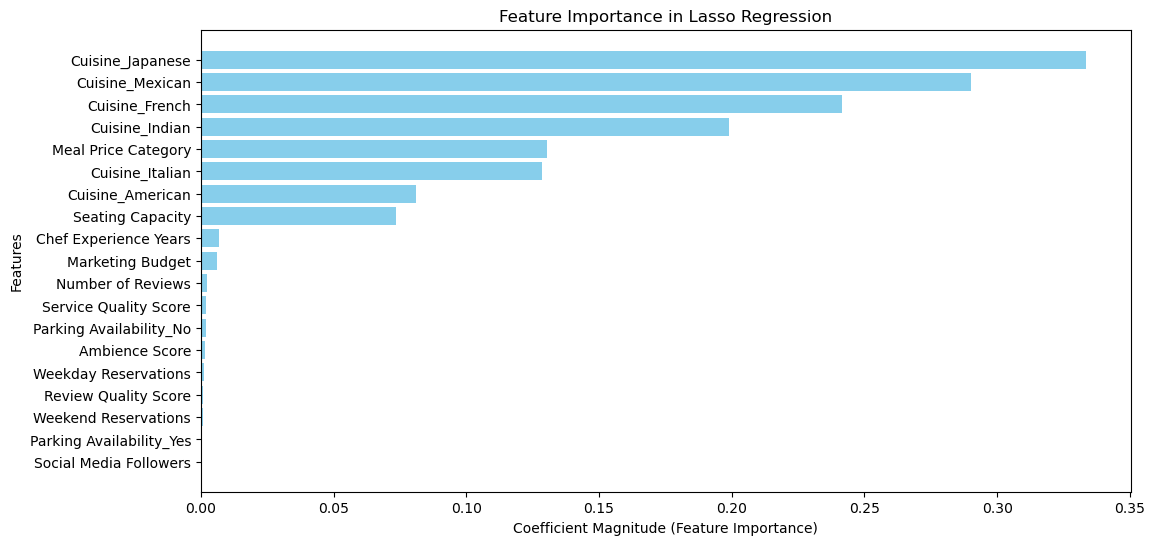

In [32]:
# Get feature names
features = Train_df_x1.columns

# Get absolute coefficients
lasso_coefficients = np.abs(lasso_model_best.coef_)

# Sort features by importance
sorted_indices = np.argsort(lasso_coefficients)[::-1]  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.barh(np.array(features)[sorted_indices], lasso_coefficients[sorted_indices], color='skyblue')
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance in Lasso Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

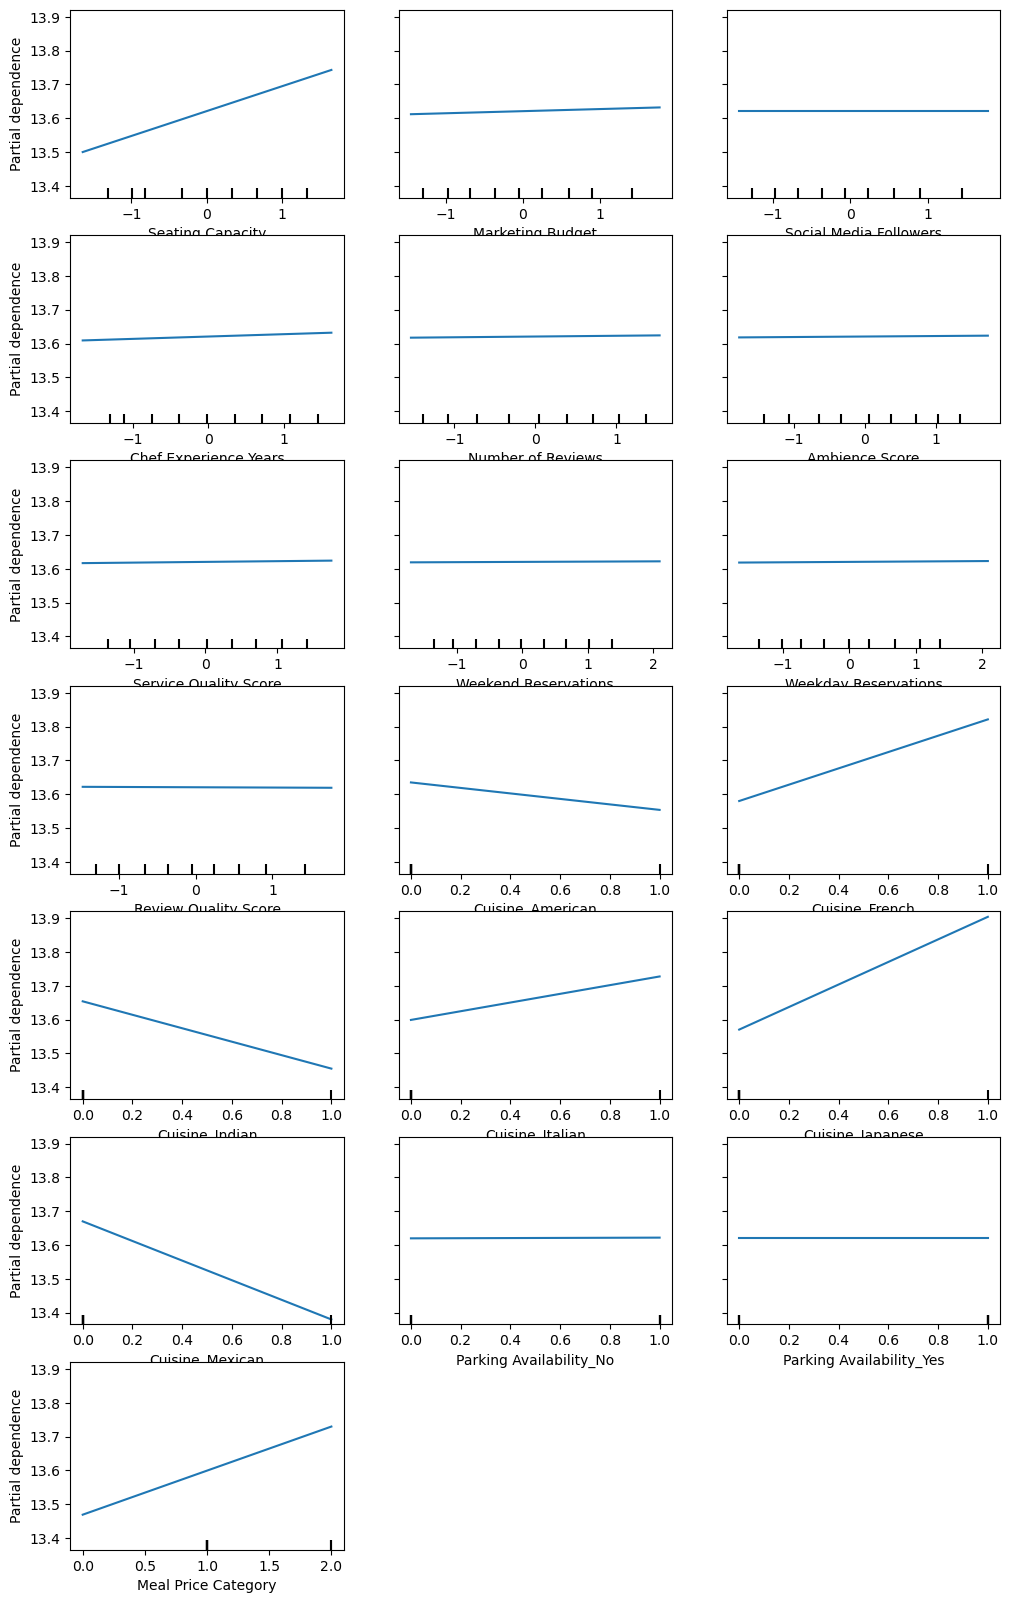

In [33]:
# Select features for PDP
features = Train_df_x1.columns  # All features

# Compute Partial Dependence
fig, ax = plt.subplots(figsize=(12, 20))
display = PartialDependenceDisplay.from_estimator(lasso_model_best, Train_df_x1, features, ax=ax)
plt.show()

In [34]:
# Get the coefficients (feature importance) from the trained Lasso model
lasso_coefficients = lasso_model_best.coef_

# Create a DataFrame to view the feature importance with their corresponding names
feature_importance = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Coefficient': lasso_coefficients
})

# Sort the features based on the absolute value of the coefficients to get the most important ones
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print("Feature Importance (sorted by absolute value of coefficients):")
print(feature_importance_sorted[['Feature', 'Coefficient']])


Feature Importance (sorted by absolute value of coefficients):
                     Feature   Coefficient
14          Cuisine_Japanese  3.336183e-01
15           Cuisine_Mexican -2.901745e-01
11            Cuisine_French  2.414259e-01
12            Cuisine_Indian -1.990766e-01
18       Meal Price Category  1.303562e-01
13           Cuisine_Italian  1.285661e-01
10          Cuisine_American -8.120147e-02
0           Seating Capacity  7.349102e-02
3      Chef Experience Years  6.934001e-03
1           Marketing Budget  6.208678e-03
4          Number of Reviews  2.212360e-03
6      Service Quality Score  2.140167e-03
16   Parking Availability_No  2.118030e-03
5             Ambience Score  1.479757e-03
8       Weekday Reservations  1.199919e-03
9       Review Quality Score -8.720436e-04
7       Weekend Reservations  7.855163e-04
17  Parking Availability_Yes -2.785892e-18
2     Social Media Followers -0.000000e+00


### Elastic Net Regression

In [43]:
# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)   # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=5)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_df_x1, Train_df_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.564e-02, tolerance: 1.617e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.838e-02, tolerance: 1.614e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

Best parameters for Elastic Net Regression: {'alpha': 0.00013257113655901095, 'l1_ratio': 0.8}
Best score for Elastic Net Regression: -0.0038191403585417206


In [45]:
# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_df_x1, Train_df_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_df_x1)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_df_x1)


In [54]:
# Compute Performance Metrics

# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = root_mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_rmse = root_mean_squared_error(Test_y, elasticnet_test_predictions)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_df_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse


In [63]:
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 0.0037525462166128096
Elastic Net Regression Test MSE: 0.0037809588040775004
Elastic Net Regression Train RMSE: 0.06125802981334618
Elastic Net Regression Test RMSE: 0.061489501576102404
Elastic Net Regression Train MAE: 0.05035984049989034
Elastic Net Regression Test MAE: 0.05076628098219897
Elastic Net Regression Train R²: 0.9591089821856799
Elastic Net Regression Test R²: 0.9575796101899893
Elastic Net Train-Test MSE Difference: -2.8412587464690837e-05


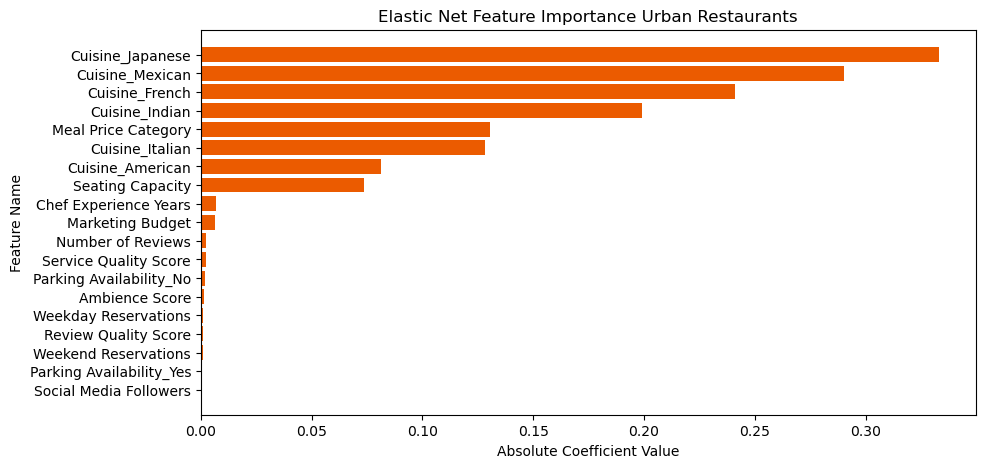

In [64]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Extract feature importance (absolute value of coefficients)
feature_importance = np.abs(elasticnet_model_best.coef_)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="#EB5B00")
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Elastic Net Feature Importance Urban Restaurants')
plt.gca().invert_yaxis()  # Invert y-axis to show top features first
plt.show()


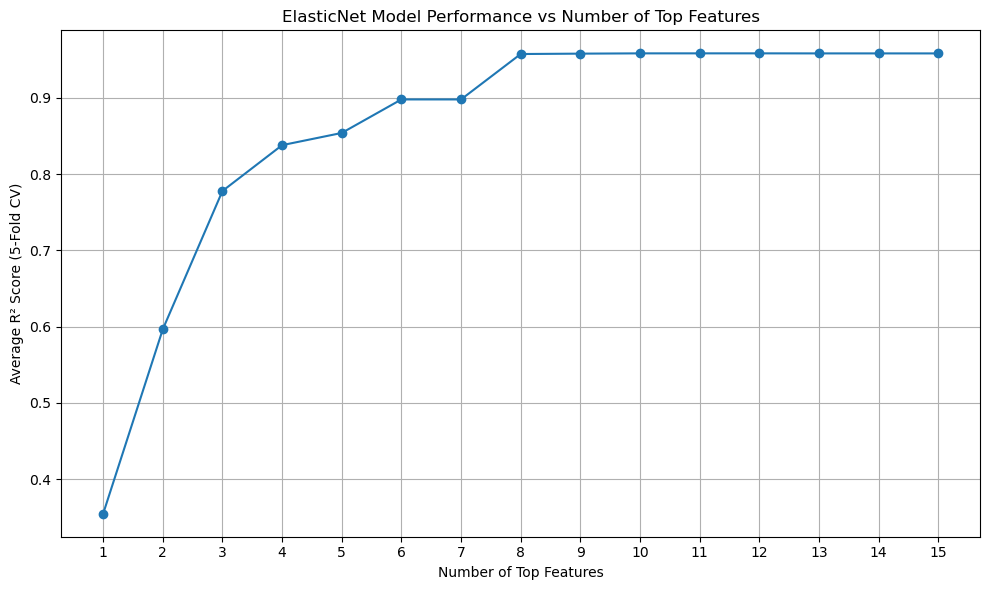

Top 1 features: Avg R² = 0.355
Top 2 features: Avg R² = 0.597
Top 3 features: Avg R² = 0.778
Top 4 features: Avg R² = 0.838
Top 5 features: Avg R² = 0.854
Top 6 features: Avg R² = 0.898
Top 7 features: Avg R² = 0.898
Top 8 features: Avg R² = 0.958
Top 9 features: Avg R² = 0.958
Top 10 features: Avg R² = 0.959
Top 11 features: Avg R² = 0.959
Top 12 features: Avg R² = 0.959
Top 13 features: Avg R² = 0.958
Top 14 features: Avg R² = 0.958
Top 15 features: Avg R² = 0.958


In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Get and sort important features by absolute value of coefficients
important_features_df = pd.DataFrame({
    'feature': Train_df_x1.columns,
    'importance': np.abs(elasticnet_model_best.coef_)
}).sort_values(by='importance', ascending=False)

# Store results for plotting
feature_counts = []
r2_scores = []

# Test performance for different numbers of top features
for n in range(1, 16):
    top_features = important_features_df.head(n)['feature'].values.tolist()
    
    X_subset = Train_df_x1[top_features]
    y_target = Train_df_y

    scores = cross_val_score(
        ElasticNet(alpha=elasticnet_model_best.alpha, l1_ratio=elasticnet_model_best.l1_ratio),
        X_subset,
        y_target,
        cv=5,
        scoring='r2'
    )
    
    feature_counts.append(n)
    r2_scores.append(np.mean(scores))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, r2_scores, marker='o', linestyle='-')
plt.title("ElasticNet Model Performance vs Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Average R² Score (5-Fold CV)")
plt.grid(True)
plt.xticks(feature_counts)
plt.tight_layout()
plt.show()
for n in range(1, 16):
    top_features = important_features_df.head(n)['feature'].values.tolist()
    
    X_subset = Train_df_x1[top_features]  # Your feature matrix
    y_target = Train_df_y                 # Your log(revenue) target

    # Perform cross-validation
    scores = cross_val_score(ElasticNet(alpha=elasticnet_model_best.alpha, l1_ratio=elasticnet_model_best.l1_ratio),
                             X_subset, y_target, cv=5, scoring='r2')
    
    print(f"Top {n} features: Avg R² = {np.mean(scores):.3f}")
    

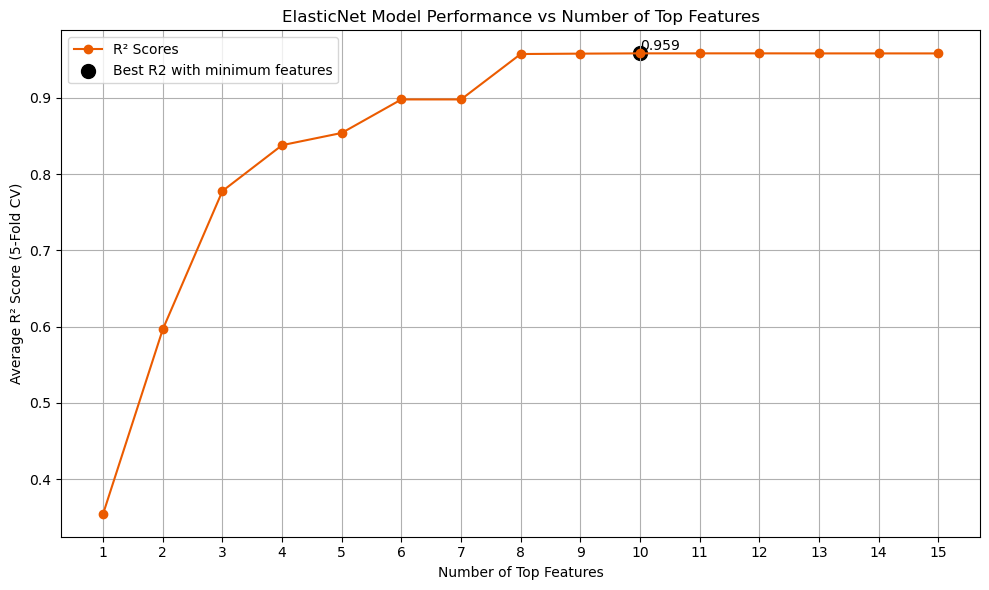

In [66]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, r2_scores, marker='o', linestyle='-', color='#EB5B00', label="R² Scores")

# Highlight the point for 10 features
if 10 in feature_counts:
    idx_10 = feature_counts.index(10)
    plt.scatter(10, r2_scores[idx_10], color='black', s=100, label='Best R2 with minimum features')

    # Optionally annotate the point with the R² value
    plt.annotate(f"{r2_scores[idx_10]:.3f}", (10, r2_scores[idx_10] + 0.005), color='black')

plt.title("ElasticNet Model Performance vs Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Average R² Score (5-Fold CV)")
plt.grid(True)
plt.xticks(feature_counts)
plt.legend()
plt.tight_layout()
plt.show()


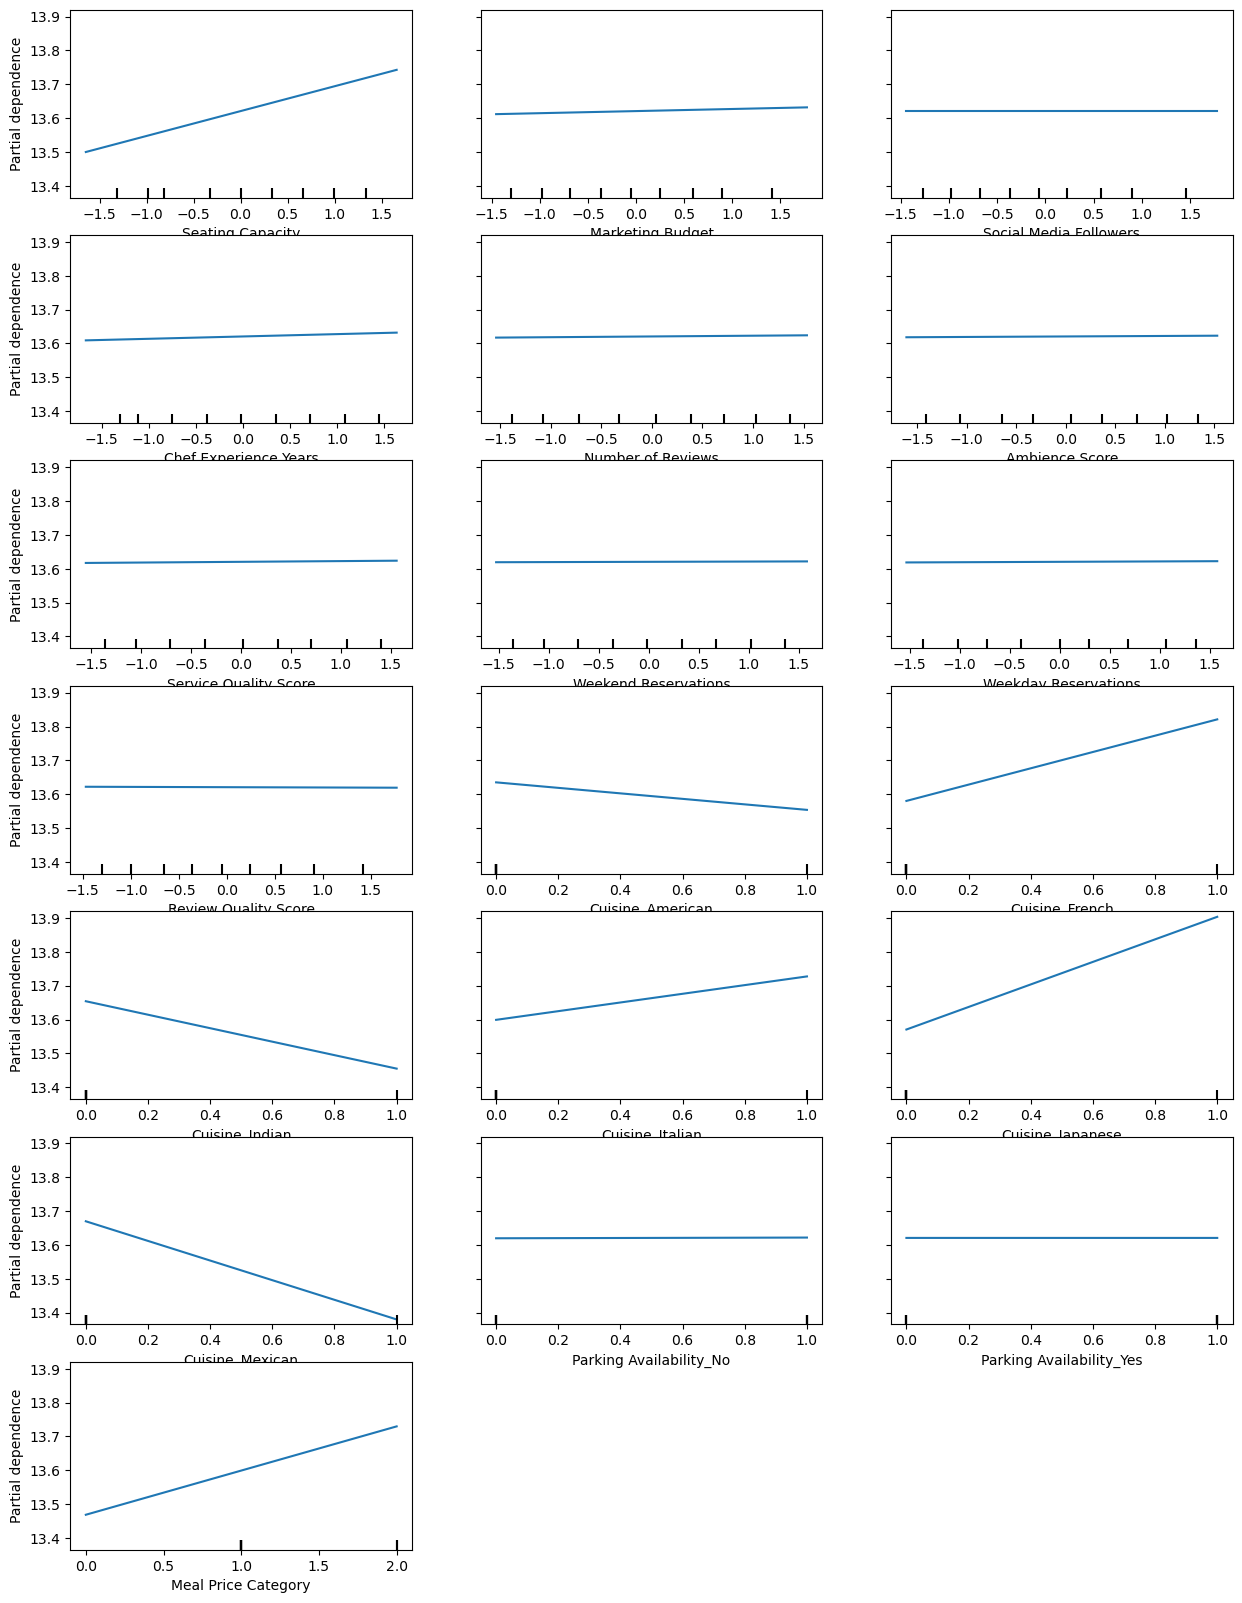

In [67]:
# Select all features for PDP
all_features_pdp = Train_df_x1.columns.tolist()

# Generate PDP plots for all features
fig, ax = plt.subplots(figsize=(15, 20))
display = PartialDependenceDisplay.from_estimator(
    elasticnet_model_best, Train_df_x1, features=all_features_pdp, ax=ax, grid_resolution=50
)
plt.show()


In [71]:
# Assuming 'elasticnet_model_best' is your fitted ElasticNet model
coefficients = elasticnet_model_best.coef_

# Create a DataFrame for better readability
feature_importance_en = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to get importance
feature_importance_en['Abs_Coefficient'] = feature_importance_en['Coefficient'].abs()
feature_importance_en = feature_importance_en.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature importance
print(feature_importance_en[['Feature', 'Coefficient']])

                     Feature  Coefficient
14          Cuisine_Japanese     0.333092
15           Cuisine_Mexican    -0.290152
11            Cuisine_French     0.241032
12            Cuisine_Indian    -0.199181
18       Meal Price Category     0.130597
13           Cuisine_Italian     0.128333
10          Cuisine_American    -0.081328
0           Seating Capacity     0.073486
3      Chef Experience Years     0.006924
1           Marketing Budget     0.006204
4          Number of Reviews     0.002207
6      Service Quality Score     0.002133
16   Parking Availability_No     0.002096
5             Ambience Score     0.001470
8       Weekday Reservations     0.001192
9       Review Quality Score    -0.000863
7       Weekend Reservations     0.000780
17  Parking Availability_Yes    -0.000005
2     Social Media Followers     0.000000


In [73]:
# Remove the unimportant variables
selected_features = ['Cuisine_Japanese', 'Cuisine_French', 'Cuisine_Italian', 'Cuisine_American',
                     'Cuisine_Mexican', 'Cuisine_Indian','Meal Price Category',  'Seating Capacity','Chef Experience Years', 'Marketing Budget']

Train_df_x1_selected = Train_df_x1[selected_features]  # Subset of the training data with selected features
Test_df_x1_selected = Test_df_x1[selected_features]  # Subset of the test data with selected features

# Define parameter grid for Elastic Net (Grid Search)
param_grid_elasticnet = {
    'alpha': np.logspace(-4, 2, 50),  
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # Ratio of L1 (Lasso) to L2 (Ridge) penalty
}

# Initialize Elastic Net model
elasticnet_model_tuned = ElasticNet()

# Perform Grid Search with cross-validation (cv=10)
grid_search_elasticnet = GridSearchCV(
    elasticnet_model_tuned, 
    param_grid_elasticnet, 
    cv=10, 
    scoring='neg_mean_squared_error'
)

# Fit Grid Search on training data
grid_search_elasticnet.fit(Train_df_x1_selected, Train_df_y)

# Extract best parameters and best score
best_params_elasticnet = grid_search_elasticnet.best_params_
best_score_elasticnet = grid_search_elasticnet.best_score_

# Print best parameters and score
print("Best parameters for Elastic Net Regression:", best_params_elasticnet)
print("Best score for Elastic Net Regression:", best_score_elasticnet)

# Train the Best Elastic Net Model
# Initialize best Elastic Net model with optimal parameters
elasticnet_model_best = ElasticNet(**best_params_elasticnet)

# Train the model on scaled training data
elasticnet_model_best.fit(Train_df_x1_selected, Train_df_y)

# Predictions and Error Metrics
# Predictions on the training set
elasticnet_train_predictions = elasticnet_model_best.predict(Train_df_x1_selected)

# Predictions on the test set
elasticnet_test_predictions = elasticnet_model_best.predict(Test_df_x1_selected)

# Compute Performance Metrics
# Mean Squared Error (MSE)
elasticnet_train_mse = mean_squared_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mse = mean_squared_error(Test_y, elasticnet_test_predictions)

# Root Mean Squared Error (RMSE)
elasticnet_train_rmse = np.sqrt(elasticnet_train_mse)
elasticnet_test_rmse = np.sqrt(elasticnet_test_mse)

# Mean Absolute Error (MAE)
elasticnet_train_mae = mean_absolute_error(Train_df_y, elasticnet_train_predictions)
elasticnet_test_mae = mean_absolute_error(Test_y, elasticnet_test_predictions)

# R² Score (Coefficient of Determination)
elasticnet_train_r2 = r2_score(Train_df_y, elasticnet_train_predictions)
elasticnet_test_r2 = r2_score(Test_y, elasticnet_test_predictions)

# MSE Difference (Overfitting Indicator)
elasticnet_mse_difference = elasticnet_train_mse - elasticnet_test_mse



C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e-01, tolerance: 1.617e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e-01, tolerance: 1.614e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

Best parameters for Elastic Net Regression: {'alpha': 0.0001, 'l1_ratio': 0.1}
Best score for Elastic Net Regression: -0.003809325634060863


C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e-01, tolerance: 1.792e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHATHURANGI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e-01, tolerance: 1.792e-02
  model = cd_fast.enet_coordinate_descent(


In [74]:
# Print performance metrics
print("Elastic Net Regression Train MSE:", elasticnet_train_mse)
print("Elastic Net Regression Test MSE:", elasticnet_test_mse)
print("Elastic Net Regression Train RMSE:", elasticnet_train_rmse)
print("Elastic Net Regression Test RMSE:", elasticnet_test_rmse)
print("Elastic Net Regression Train MAE:", elasticnet_train_mae)
print("Elastic Net Regression Test MAE:", elasticnet_test_mae)
print("Elastic Net Regression Train R²:", elasticnet_train_r2)
print("Elastic Net Regression Test R²:", elasticnet_test_r2)
print("Elastic Net Train-Test MSE Difference:", elasticnet_mse_difference)

Elastic Net Regression Train MSE: 0.0037700798025964493
Elastic Net Regression Test MSE: 0.003809251686272132
Elastic Net Regression Train RMSE: 0.06140097558342578
Elastic Net Regression Test RMSE: 0.06171913549517793
Elastic Net Regression Train MAE: 0.05048963767617671
Elastic Net Regression Test MAE: 0.05085507662125579
Elastic Net Regression Train R²: 0.958917920934087
Elastic Net Regression Test R²: 0.9572621787780812
Elastic Net Train-Test MSE Difference: -3.917188367568271e-05


In [75]:
# After training the best Elastic Net model with selected features
# Get the coefficients for the reduced model
coefficients = elasticnet_model_best.coef_

# Create a DataFrame to display the features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': selected_features,  # The selected features
    'Coefficient': coefficients  # The coefficients from the trained model
})

# Sort the coefficients by absolute value to see the most important features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the coefficients for the reduced model
print(coef_df)


                 Feature  Coefficient  Abs_Coefficient
0       Cuisine_Japanese     0.350479         0.350479
4        Cuisine_Mexican    -0.274832         0.274832
1         Cuisine_French     0.258349         0.258349
5         Cuisine_Indian    -0.183151         0.183151
2        Cuisine_Italian     0.144878         0.144878
6    Meal Price Category     0.129632         0.129632
7       Seating Capacity     0.073900         0.073900
3       Cuisine_American    -0.065723         0.065723
8  Chef Experience Years     0.006994         0.006994
9       Marketing Budget     0.006283         0.006283


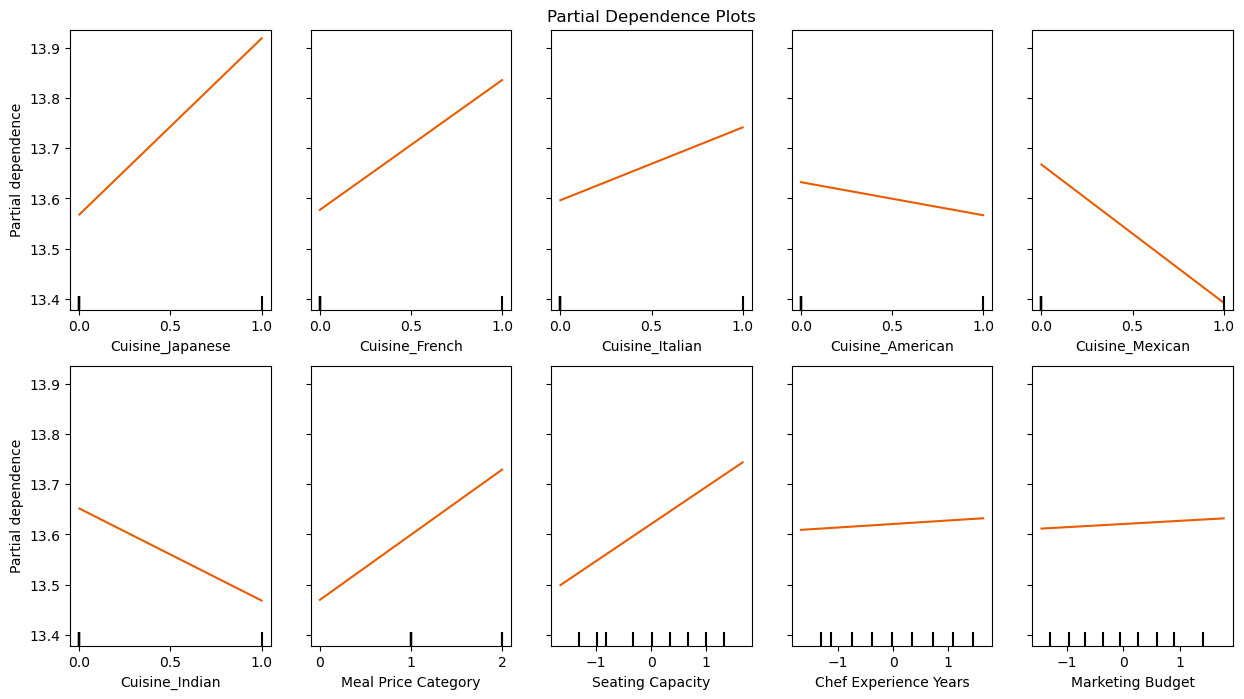

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=elasticnet_model_best,                  # Your trained ElasticNet model
    X=Train_df_x1_selected,                 # Input features (not transformed back)
    features=selected_features,                       # All features to plot
    random_state=5,
    n_cols=5,                                         # Show 5 plots per row
    ax=ax,
    line_kw={"color": "#EB5B00"}                      # Line color (your brand orange)
)
plt.savefig("partial_dependence_plots.png", dpi=300, bbox_inches="tight")
plt.show()


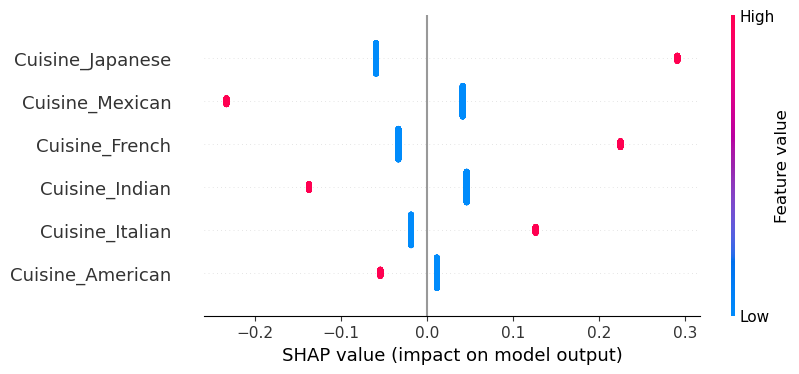

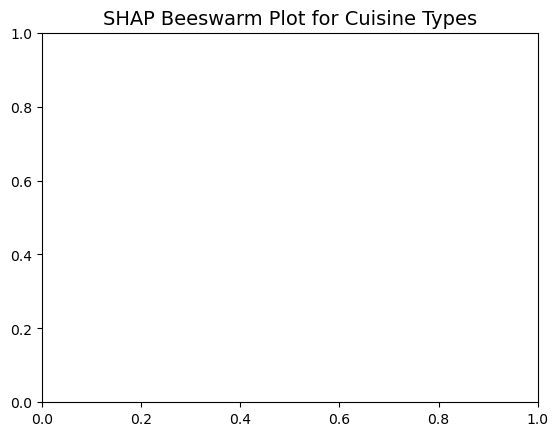

In [90]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer
explainer = shap.Explainer(elasticnet_model_best, Train_df_x1_selected)

# Calculate SHAP values
shap_values = explainer(Train_df_x1_selected)

# List of cuisine-related feature names (adjust based on your actual columns)
cuisine_features = [col for col in Train_df_x1_selected.columns 
                    if col.startswith('Cuisine_')]

# Filter SHAP values to include only cuisine features
shap_values_cuisine = shap_values[:, cuisine_features]

# Plot beeswarm for cuisine features only
shap.plots.beeswarm(shap_values_cuisine)

# Customize the plot (optional)
plt.title("SHAP Beeswarm Plot for Cuisine Types", fontsize=14)
plt.show()

In [529]:
numerical_cols2 = ['Seating Capacity', 'Chef Experience Years', 'Marketing Budget']

# Apply inverse transform to the full set of numerical columns
rescaled_all = scaler.inverse_transform(Train_df_x1[numerical_cols])  # original 10 cols

# Turn it back into a DataFrame
rescaled_all_df = pd.DataFrame(rescaled_all, columns=numerical_cols)

# Now select the 3 columns you want
rescaled_selected_df = rescaled_all_df[numerical_cols2]

In [530]:
rescaled_selected_df

,Seating Capacity,Chef Experience Years,Marketing Budget
0,90.0,13.0,5031.0
1,87.0,14.0,4113.0
2,83.0,16.0,3941.0
3,78.0,3.0,2614.0
4,77.0,11.0,1843.0
...,...,...,...
1948,73.0,18.0,1974.0
1949,80.0,12.0,1735.0
1950,81.0,1.0,3166.0
1951,77.0,9.0,2171.0


In [543]:
Train_df_x1_new

,Cuisine_Japanese,Cuisine_French,Cuisine_Italian,Cuisine_Mexican,Meal Price Category,Cuisine_Indian,Seating Capacity,Chef Experience Years,Marketing Budget
0,0.0,0.0,1.0,0.0,1,0.0,90.0,13.0,5031.0
1,0.0,0.0,0.0,0.0,1,1.0,87.0,14.0,4113.0
2,0.0,0.0,1.0,0.0,1,0.0,83.0,16.0,3941.0
3,0.0,0.0,0.0,1.0,0,0.0,78.0,3.0,2614.0
4,0.0,0.0,0.0,0.0,1,0.0,77.0,11.0,1843.0
...,...,...,...,...,...,...,...,...,...
1948,0.0,1.0,0.0,0.0,1,0.0,73.0,18.0,1974.0
1949,0.0,1.0,0.0,0.0,1,0.0,80.0,12.0,1735.0
1950,0.0,0.0,0.0,1.0,0,0.0,81.0,1.0,3166.0
1951,0.0,0.0,0.0,0.0,1,1.0,77.0,9.0,2171.0


In [545]:
Train_df_x1_new = Train_df_x1[selected_features].drop(columns=[col for col in numerical_cols2 if col in selected_features]).copy()
for col in numerical_cols2:
    Train_df_x1_new[col] = rescaled_selected_df[col]
Train_df_x1_new

,Cuisine_Japanese,Cuisine_French,Cuisine_Italian,Cuisine_Mexican,Meal Price Category,Cuisine_Indian,Seating Capacity,Chef Experience Years,Marketing Budget
0,0.0,0.0,1.0,0.0,1,0.0,90.0,13.0,5031.0
1,0.0,0.0,0.0,0.0,1,1.0,87.0,14.0,4113.0
2,0.0,0.0,1.0,0.0,1,0.0,83.0,16.0,3941.0
3,0.0,0.0,0.0,1.0,0,0.0,78.0,3.0,2614.0
4,0.0,0.0,0.0,0.0,1,0.0,77.0,11.0,1843.0
...,...,...,...,...,...,...,...,...,...
1948,0.0,1.0,0.0,0.0,1,0.0,73.0,18.0,1974.0
1949,0.0,1.0,0.0,0.0,1,0.0,80.0,12.0,1735.0
1950,0.0,0.0,0.0,1.0,0,0.0,81.0,1.0,3166.0
1951,0.0,0.0,0.0,0.0,1,1.0,77.0,9.0,2171.0


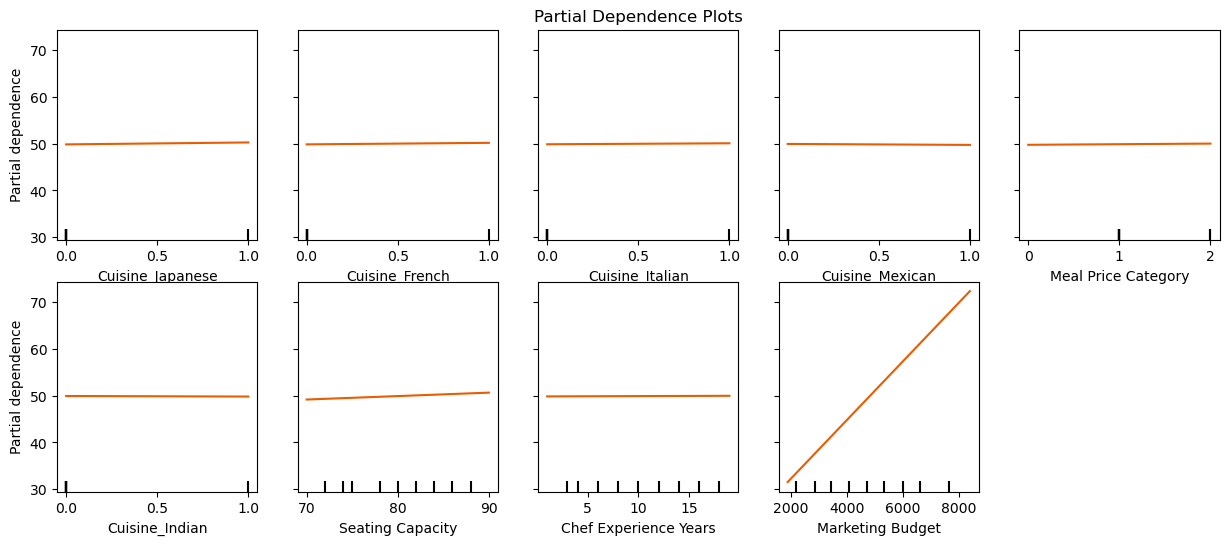

In [431]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=elasticnet_model_best,
    X = Train_df_x1_new,
    features= Train_df_x1_new.columns, 
    kind='average',
    random_state=5,
    n_cols=5,
    ax=ax,
    line_kw={"color": "#EB5B00"},
)
plt.savefig("partial_dependence_plots.png", dpi=300, bbox_inches="tight")
plt.show()


In [433]:
# Predict using your model on X_train
y_pred = elasticnet_model_best.predict(Train_df_x1[selected_features])

print("Prediction range:", y_pred.min(), "to", y_pred.max())


Prediction range: 13.036636106586375 to 14.191965900132516


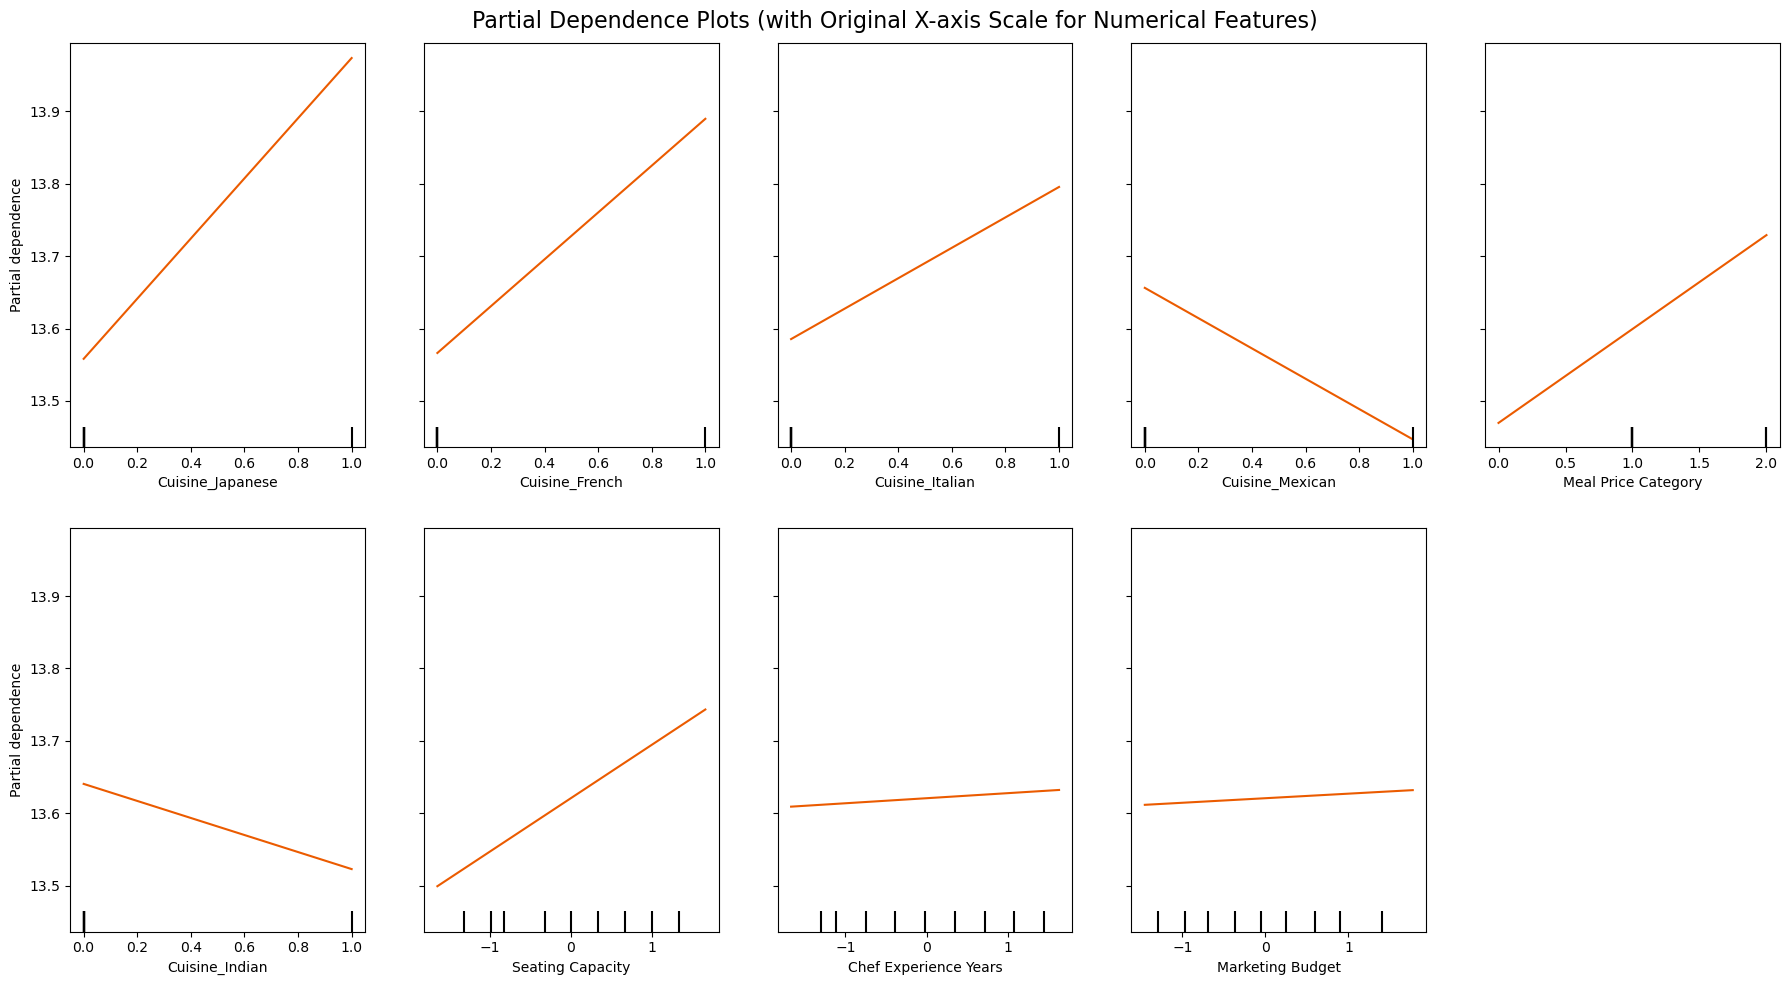

In [437]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define your scaled numerical columns
numerical_cols = ['Seating Capacity', 'Chef Experience Years', 'Marketing Budget']

# Match feature index in StandardScaler (assumes same order)
scaler_feature_indices = [Train_df_x1.columns.get_loc(col) for col in numerical_cols]

# Create PDP display
fig, ax = plt.subplots(figsize=(18, 10))
display = PartialDependenceDisplay.from_estimator(
    estimator=elasticnet_model_best,
    X=Train_df_x1[selected_features],   # scaled input
    features=selected_features,
    feature_names=selected_features,
    kind='average',
    n_cols=5,
    ax=ax,
    line_kw={"color": "#EB5B00"},
    random_state=42
)

# Override X-axis labels for numerical features only
for i, feature in enumerate(display.features):
    if feature in numerical_cols:
        # Get the index of the feature in original scaler
        scaler_index = numerical_cols.index(feature)
        
        # Get grid values from PDP (still in scaled form)
        scaled_ticks = display.pd_results[i][0]

        # Manually inverse-transform
        mean = scaler.mean_[scaler_index]
        std = scaler.scale_[scaler_index]
        original_ticks = scaled_ticks * std + mean

        # Update ticks
        ax[i].set_xticks(scaled_ticks)
        ax[i].set_xticklabels([f"{val:.0f}" for val in original_ticks], rotation=45)
        ax[i].set_xlabel(f"{feature} (Original Scale)")

plt.suptitle("Partial Dependence Plots (with Original X-axis Scale for Numerical Features)", fontsize=16)
plt.tight_layout()
plt.show()


In [82]:
import joblib
joblib.dump(elasticnet_model_best, 'model.pkl')


['model.pkl']

In [88]:
!pip install flask


### Ridge Regression

In [75]:
# Define hyperparameter grid
param_grid_ridge = {
    'alpha': np.logspace(-4, 2, 50)  # Regularization strength
}

# Perform Grid Search for best hyperparameters
ridge_model_tuned = Ridge()
grid_search_ridge = GridSearchCV(ridge_model_tuned, param_grid_ridge, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge.fit(Train_df_x1, Train_df_y)

# Get best parameters & score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge Regression:", best_params_ridge)
print("Best score for Ridge Regression:", best_score_ridge)

Best parameters for Ridge Regression: {'alpha': 0.0655128556859551}
Best score for Ridge Regression: -0.003821759776991654


In [77]:
# Fit model with best parameters
ridge_model_best = Ridge(**best_params_ridge)
ridge_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
ridge_train_predictions = ridge_model_best.predict(Train_df_x1)

# Predictions on the test set
ridge_test_predictions = ridge_model_best.predict(Test_df_x1)

In [79]:
# Compute Performance Metrics
ridge_train_mse = mean_squared_error(Train_df_y, ridge_train_predictions)
ridge_test_mse = mean_squared_error(Test_y, ridge_test_predictions)

ridge_train_rmse = root_mean_squared_error(Train_df_y, ridge_train_predictions)
ridge_test_rmse = root_mean_squared_error(Test_y, ridge_test_predictions)

ridge_train_mae = mean_absolute_error(Train_df_y, ridge_train_predictions)
ridge_test_mae = mean_absolute_error(Test_y, ridge_test_predictions)

ridge_train_r2 = r2_score(Train_df_y, ridge_train_predictions)
ridge_test_r2 = r2_score(Test_y, ridge_test_predictions)

# MSE Difference (Overfitting Indicator)
ridge_mse_difference = ridge_train_mse - ridge_test_mse

# Print results
print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Ridge Regression Train MAE:", ridge_train_mae)
print("Ridge Regression Test MAE:", ridge_test_mae)
print("Ridge Regression Train R²:", ridge_train_r2)
print("Ridge Regression Test R²:", ridge_test_r2)
print("Ridge Train-Test MSE Difference:", ridge_mse_difference)

Ridge Regression Train MSE: 0.0037512688924213958
Ridge Regression Test MSE: 0.0038479614160203085
Ridge Regression Train RMSE: 0.06124760315654316
Ridge Regression Test RMSE: 0.06203193867694535
Ridge Regression Train MAE: 0.05031176126569895
Ridge Regression Test MAE: 0.051267397066019446
Ridge Regression Train R²: 0.959122901024583
Ridge Regression Test R²: 0.9568278757585437
Ridge Train-Test MSE Difference: -9.669252359891271e-05


### Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_df_x1, Train_df_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_df_x1, Train_df_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_df_x1)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_df_x1)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_df_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_df_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_df_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: -0.0041345198977159915
Random Forest Train MSE: 0.0017639998228537541
Random Forest Test MSE: 0.003927284826968067
Random Forest Train RMSE: 0.04199999789111607
Random Forest Test RMSE: 0.06266805268211281
Random Forest Train MAE: 0.03336182999207047
Random Forest Test MAE: 0.050873710808623226
Random Forest Train R²: 0.9807779187738082
Random Forest Test R²: 0.9559379083751818
Random Forest Train-Test MSE Difference: -0.0021632850041143122


C:\Users\CHATHURANGI\AppData\Local\Temp\ipykernel_4272\1171323325.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')


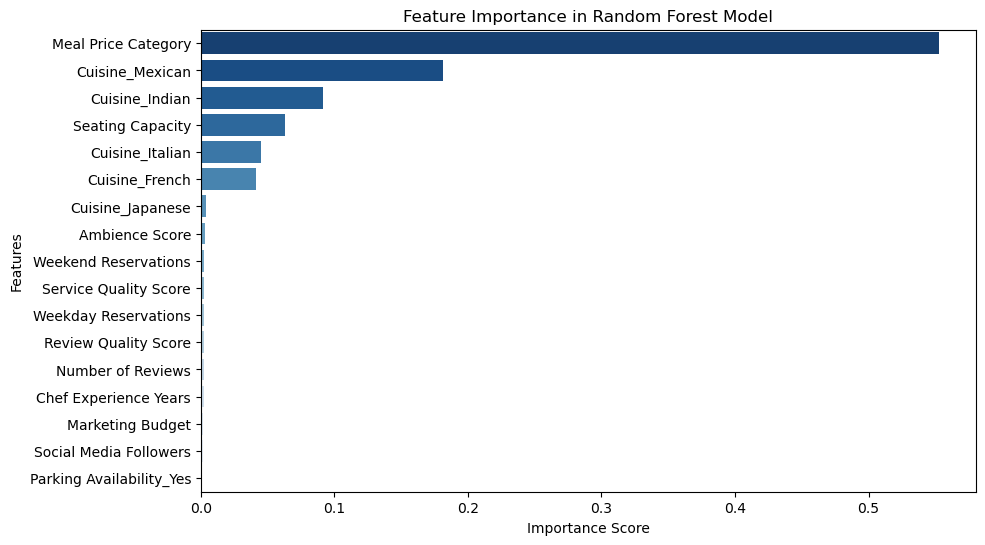

In [86]:
# Get feature importances
feature_importance = rf_model_best.feature_importances_

# Create a DataFrame for better visualization
feature_names = Train_df_x1.columns  # Column names of the dataset
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

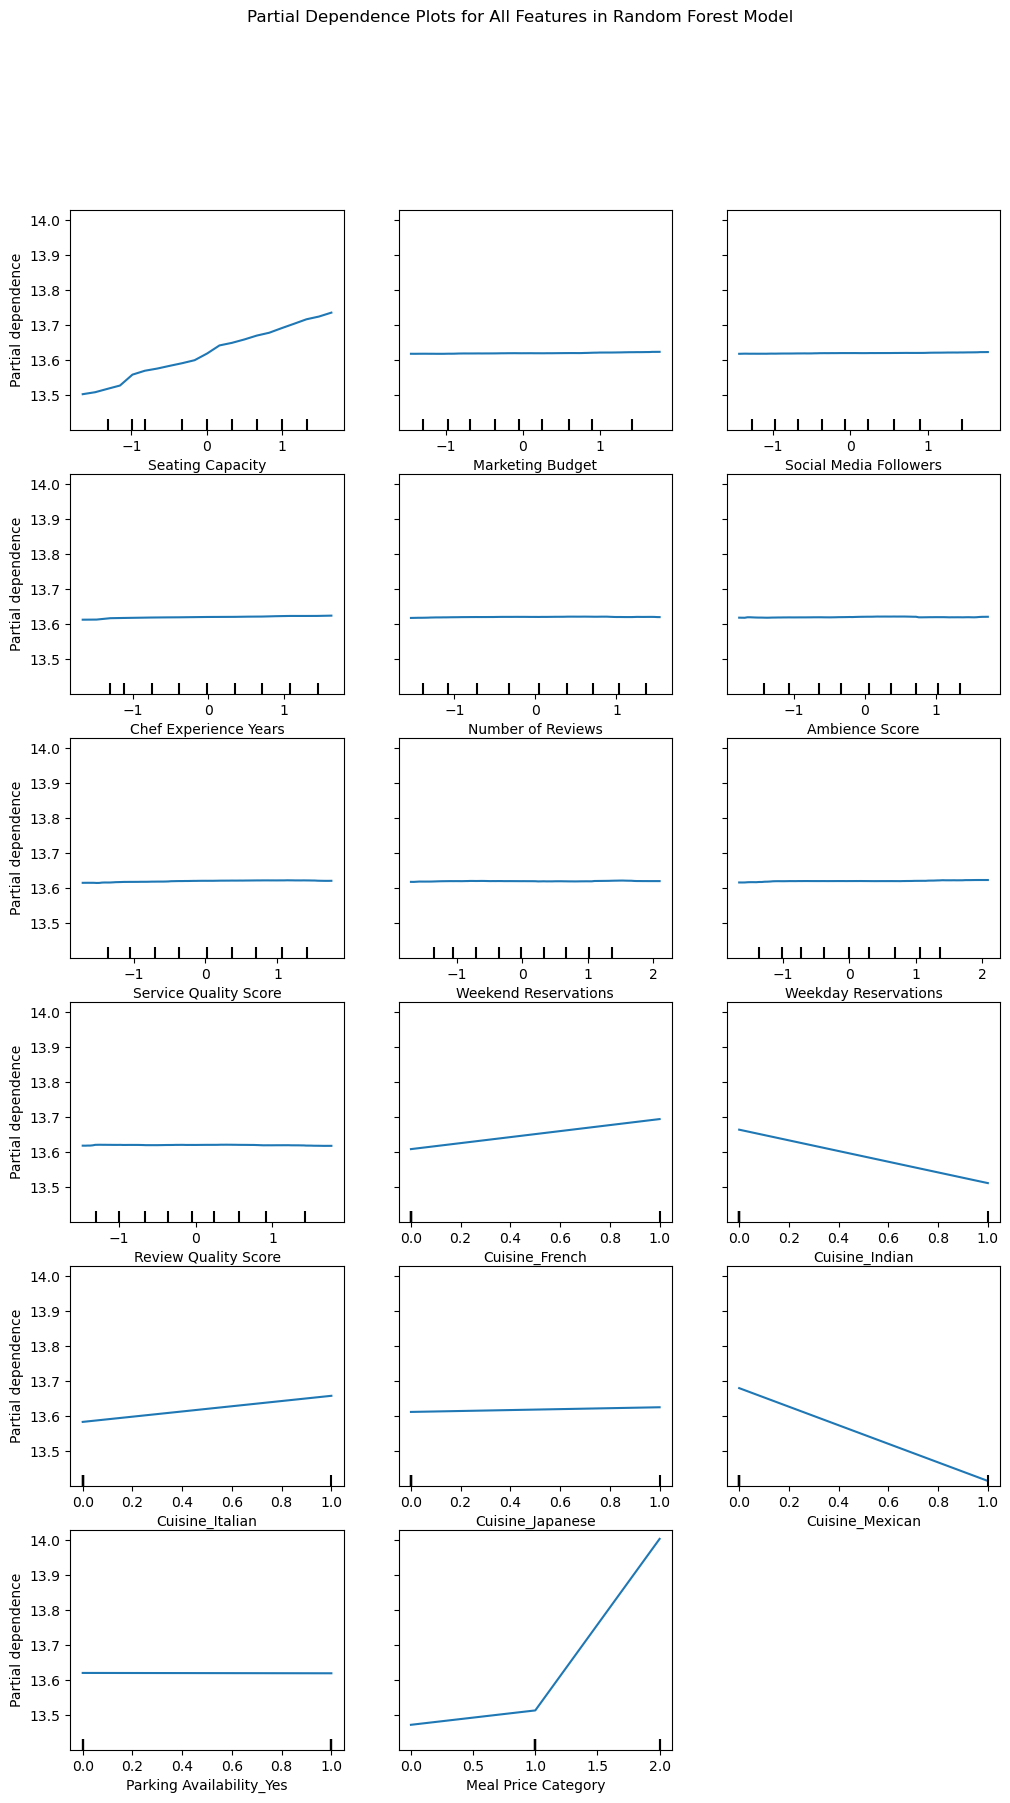

In [88]:
from sklearn.inspection import PartialDependenceDisplay

# Get all feature names from the dataset
features = Train_df_x1.columns.tolist()

# Create PDP for all features
fig, ax = plt.subplots(figsize=(12, 20))
PartialDependenceDisplay.from_estimator(rf_model_best, Train_df_x1, features, n_cols=3, ax=ax)

plt.suptitle('Partial Dependence Plots for All Features in Random Forest Model')
plt.show()

In [89]:
importances = rf_model_best.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': Train_df_x1.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

                     Feature  Importance
16       Meal Price Category    0.552628
14           Cuisine_Mexican    0.181244
11            Cuisine_Indian    0.091212
0           Seating Capacity    0.062914
12           Cuisine_Italian    0.044786
10            Cuisine_French    0.041060
13          Cuisine_Japanese    0.003841
5             Ambience Score    0.003328
7       Weekend Reservations    0.002760
6      Service Quality Score    0.002657
8       Weekday Reservations    0.002546
9       Review Quality Score    0.002462
4          Number of Reviews    0.002427
3      Chef Experience Years    0.002277
1           Marketing Budget    0.001919
2     Social Media Followers    0.001615
15  Parking Availability_Yes    0.000324


In [92]:
# List of the top 10 most important features
top_features = [
    'Meal Price Category', 'Cuisine_Mexican', 'Cuisine_Indian', 'Seating Capacity',
    'Cuisine_Italian', 'Cuisine_French', 'Cuisine_Japanese', 'Ambience Score',
   
]

# Select the top 10 features from your training and test data
Train_df_x1_top = Train_df_x1[top_features]
Test_df_x1_top = Test_df_x1[top_features]

# Perform Grid Search for best hyperparameters
rf_model_tuned = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(Train_df_x1_top, Train_df_y)

# Get best parameters & score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best score for Random Forest:", best_score_rf)

# Fit model with best parameters
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(Train_df_x1_top, Train_df_y)

# Predictions on the training set
rf_train_predictions = rf_model_best.predict(Train_df_x1_top)

# Predictions on the test set
rf_test_predictions = rf_model_best.predict(Test_df_x1_top)

# Compute Performance Metrics
rf_train_mse = mean_squared_error(Train_df_y, rf_train_predictions)
rf_test_mse = mean_squared_error(Test_y, rf_test_predictions)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

rf_train_mae = mean_absolute_error(Train_df_y, rf_train_predictions)
rf_test_mae = mean_absolute_error(Test_y, rf_test_predictions)

rf_train_r2 = r2_score(Train_df_y, rf_train_predictions)
rf_test_r2 = r2_score(Test_y, rf_test_predictions)

# MSE Difference (Overfitting Indicator)
rf_mse_difference = rf_train_mse - rf_test_mse

# Print results
print("Random Forest Train MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_test_rmse)
print("Random Forest Train MAE:", rf_train_mae)
print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Train R²:", rf_train_r2)
print("Random Forest Test R²:", rf_test_r2)
print("Random Forest Train-Test MSE Difference:", rf_mse_difference)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest: -0.004157408443125325
Random Forest Train MSE: 0.0027221438209818925
Random Forest Test MSE: 0.004113500041673071
Random Forest Train RMSE: 0.05217416813885865
Random Forest Test RMSE: 0.06413657335462404
Random Forest Train MAE: 0.04166380769484557
Random Forest Test MAE: 0.051519347388799694
Random Forest Train R²: 0.9703371457534277
Random Forest Test R²: 0.9538486705903579
Random Forest Train-Test MSE Difference: -0.0013913562206911787
